In [ ]:
import pandas as pd

df_results = pd.read_csv("experiment_results.csv") 
df_results.head()


,timestamp,prompt_variant_name,test_case_input,temperature,model_name,llm_response,latency_seconds,prompt_tokens,completion_tokens,total_tokens,system_prompt,user_prompt,human_score_relevance,human_score_clarity
0,25/07/2025 14:28,variant_A_formal,The quick brown fox jumps over the lazy dog. T...,0.2,gpt-4.1-nano,"The sentence ""The quick brown fox jumps over t...",1.7674,48,25,73,You are a formal summarizer.,Please formally summarize the following text: ...,NaN,NaN
1,25/07/2025 14:28,variant_A_formal,The quick brown fox jumps over the lazy dog. T...,0.7,gpt-4.1-nano,"The sentence ""The quick brown fox jumps over t...",0.7520,48,25,73,You are a formal summarizer.,Please formally summarize the following text: ...,NaN,NaN
2,25/07/2025 14:28,variant_A_formal,Large language models are transforming various...,0.2,gpt-4.1-nano,Large language models are revolutionizing mult...,1.2874,47,28,75,You are a formal summarizer.,Please formally summarize the following text: ...,NaN,NaN
3,25/07/2025 14:28,variant_A_formal,Large language models are transforming various...,0.7,gpt-4.1-nano,Large language models are significantly impact...,1.0245,47,28,75,You are a formal summarizer.,Please formally summarize the following text: ...,NaN,NaN
4,25/07/2025 14:28,variant_B_bullet,The quick brown fox jumps over the lazy dog. T...,0.2,gpt-4.1-nano,#NAME?,1.0214,54,26,80,You are a concise summarizer that uses bullet ...,Summarize this text using bullet points: The q...,NaN,NaN


In [7]:
if not df_results.empty:
    # Compute average and median latency, average and std of total tokens, and count of runs per variant
    avg_kpis = df_results.groupby('prompt_variant_name').agg(
        avg_latency=('latency_seconds', 'mean'),
        median_latency=('latency_seconds', 'median'),
        avg_total_tokens=('total_tokens', 'mean'),
        std_total_tokens=('total_tokens', 'std'),
        count_runs=('prompt_variant_name', 'count')  # Count of runs per variant
    ).sort_values(by='avg_latency')  # Sort by avg_latency for easier comparison

    print("\n--- Average KPIs per Prompt Variant ---")
    print(avg_kpis)
else:
    print("DataFrame is empty, skipping statistics.")



--- Average KPIs per Prompt Variant ---
                     avg_latency  median_latency  avg_total_tokens  \
prompt_variant_name                                                  
variant_A_formal        1.207825         1.15595              74.0   
variant_B_bullet        1.457575         1.24735              79.0   

                     std_total_tokens  count_runs  
prompt_variant_name                                
variant_A_formal             1.154701           4  
variant_B_bullet             3.464102           4  


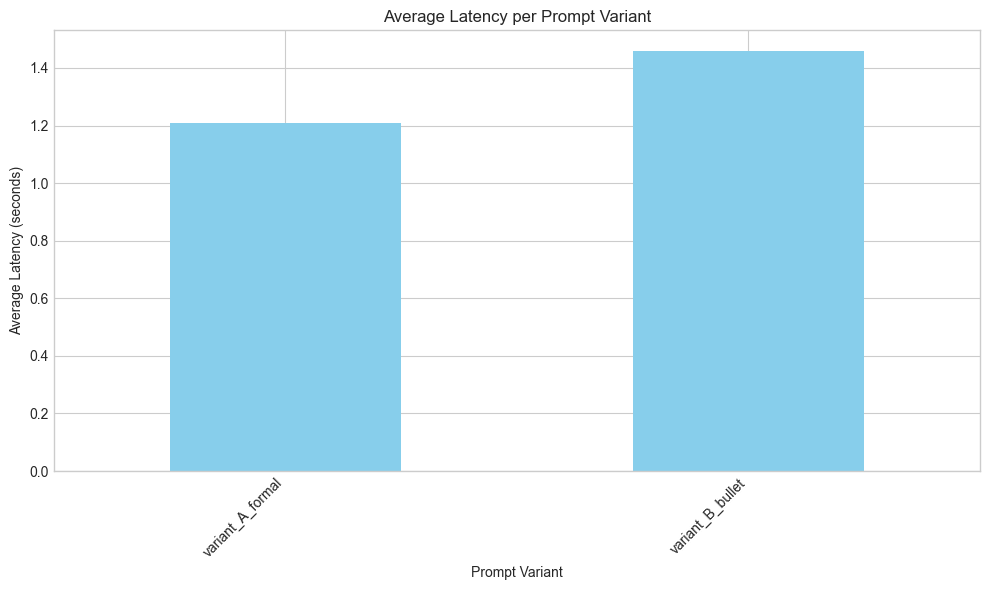

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20272\4024465431.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prompt_variant_name', y='latency_seconds', data=df_results, palette="pastel")


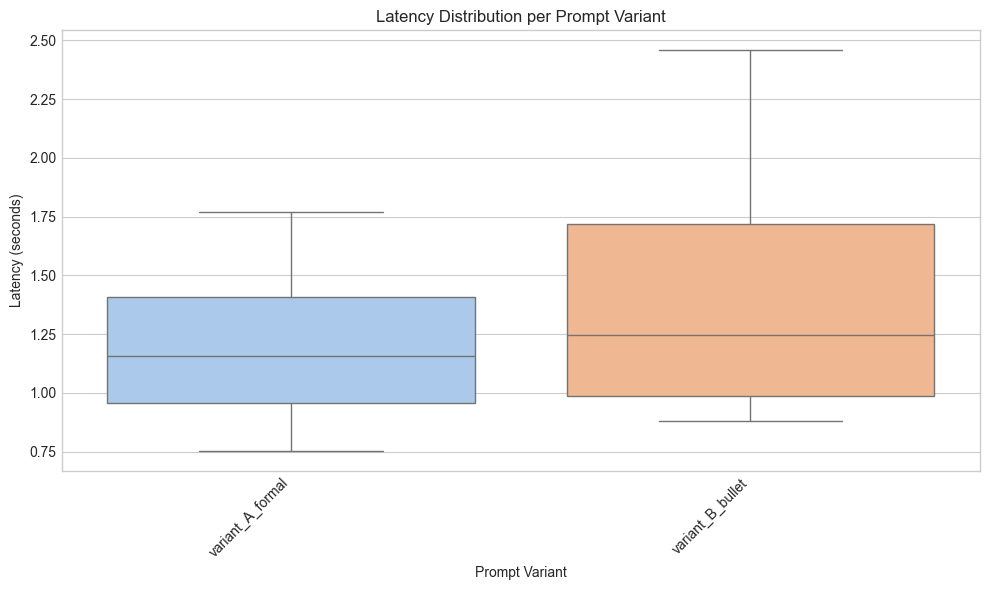

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

if not df_results.empty and not avg_kpis.empty:
    plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn style

    # Bar chart for average latency
    avg_kpis['avg_latency'].plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title('Average Latency per Prompt Variant')
    plt.ylabel('Average Latency (seconds)')
    plt.xlabel('Prompt Variant')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Box plot for latency distribution per variant
    if 'latency_seconds' in df_results.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='prompt_variant_name', y='latency_seconds', data=df_results, palette="pastel")
        plt.title('Latency Distribution per Prompt Variant')
        plt.ylabel('Latency (seconds)')
        plt.xlabel('Prompt Variant')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'latency_seconds' not found for boxplot.")

elif df_results.empty:
    print("DataFrame is empty, skipping visualizations.")
else:  # avg_kpis is empty but df_results is not (e.g. groupby failed)
    print("KPI aggregation failed, skipping visualizations.")
